In [48]:
import pandas as pd

#Ruta
path = '/datasets/final_provider/'

contract_data = pd.read_csv(path + 'contract.csv')
personal_data = pd.read_csv(path + 'personal.csv')
internet_data = pd.read_csv(path + 'internet.csv')
phone_data = pd.read_csv(path + 'phone.csv')

print("Contract Data:")
print(contract_data.info())
print(contract_data.head())

print("\nPersonal Data:")
print(personal_data.info())
print(personal_data.head())

print("\nInternet Data:")
print(internet_data.info())
print(internet_data.head())

print("\nPhone Data:")
print(phone_data.info())
print(phone_data.head())


Contract Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-


--- Estadísticas Descriptivas para MonthlyCharges ---
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

--- Distribución de Tipos de Contrato ---
Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


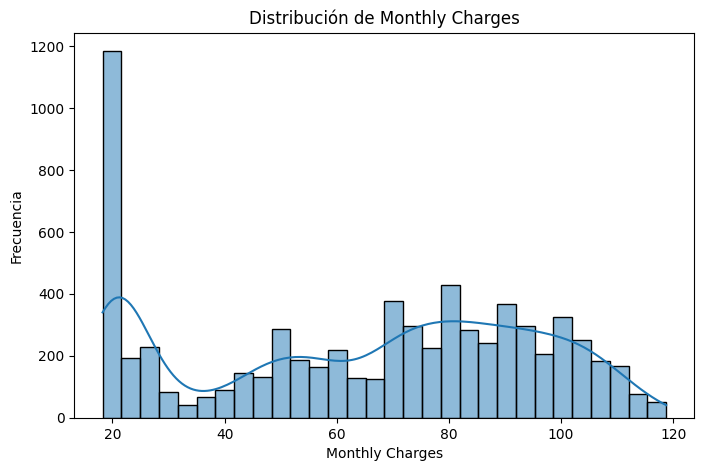


--- Distribución de Género ---
Male      3555
Female    3488
Name: gender, dtype: int64

--- Distribución de SeniorCitizen ---
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


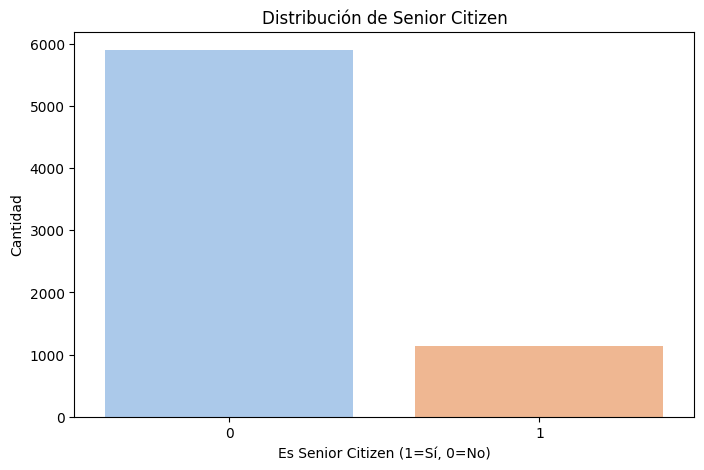


--- Distribución de InternetService ---
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

--- Distribución de OnlineSecurity ---
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64


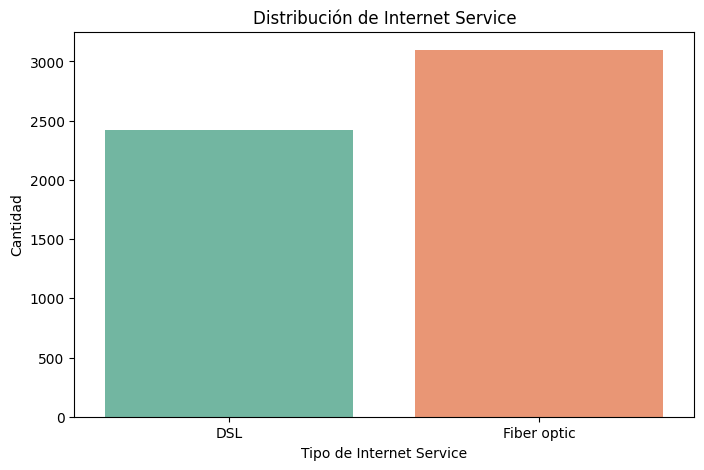


--- Distribución de MultipleLines ---
No     3390
Yes    2971
Name: MultipleLines, dtype: int64


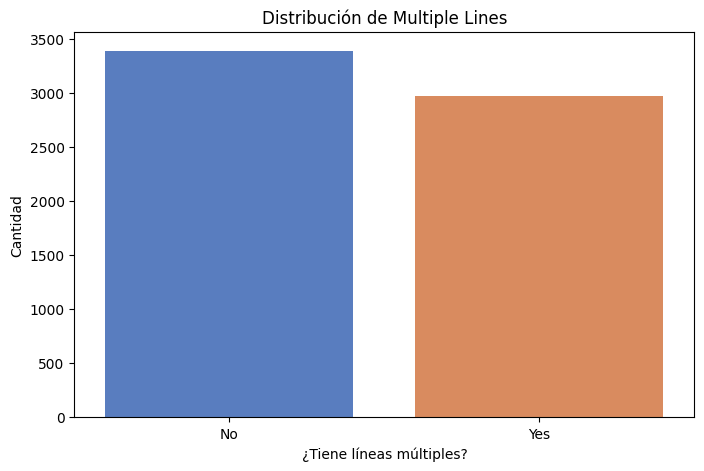

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contract Data
print("\n--- Estadísticas Descriptivas para MonthlyCharges ---")
print(contract_data['MonthlyCharges'].describe())

print("\n--- Distribución de Tipos de Contrato ---")
print(contract_data['Type'].value_counts())

plt.figure(figsize=(8, 5))
sns.histplot(contract_data['MonthlyCharges'], kde=True, bins=30)
plt.title("Distribución de Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frecuencia")
plt.show()

# Personal Data
print("\n--- Distribución de Género ---")
print(personal_data['gender'].value_counts())

print("\n--- Distribución de SeniorCitizen ---")
print(personal_data['SeniorCitizen'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', data=personal_data, palette='pastel')
plt.title("Distribución de Senior Citizen")
plt.xlabel("Es Senior Citizen (1=Sí, 0=No)")
plt.ylabel("Cantidad")
plt.show()

# Internet Data
print("\n--- Distribución de InternetService ---")
print(internet_data['InternetService'].value_counts())

print("\n--- Distribución de OnlineSecurity ---")
print(internet_data['OnlineSecurity'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', data=internet_data, palette='Set2')
plt.title("Distribución de Internet Service")
plt.xlabel("Tipo de Internet Service")
plt.ylabel("Cantidad")
plt.show()

# Phone Data
print("\n--- Distribución de MultipleLines ---")
print(phone_data['MultipleLines'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='MultipleLines', data=phone_data, palette='muted')
plt.title("Distribución de Multiple Lines")
plt.xlabel("¿Tiene líneas múltiples?")
plt.ylabel("Cantidad")
plt.show()


--- Relación entre InternetService y el Tipo de Contrato ---

Type             Month-to-month  One year  Two year
InternetService                                    
DSL                        1223       570       628
Fiber optic                2128       539       429


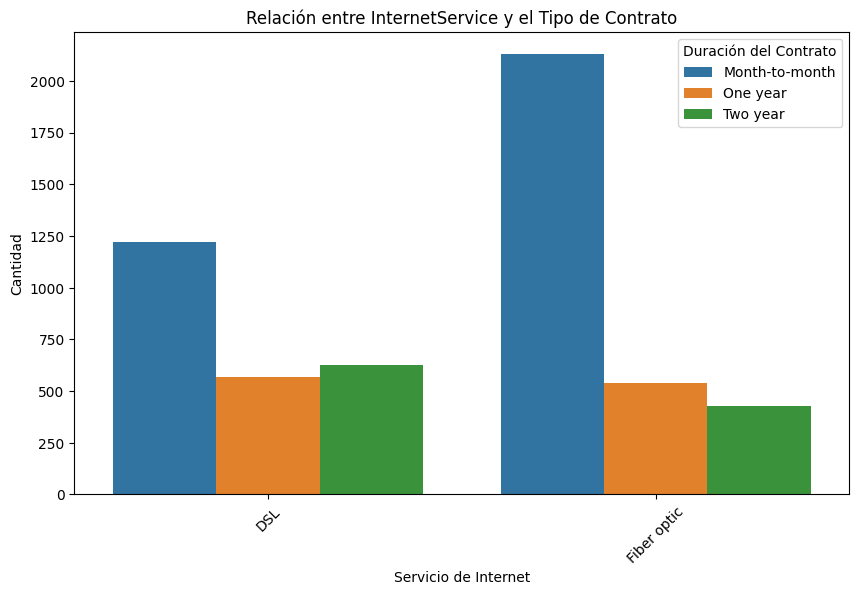


--- Relación entre MultipleLines y el Tipo de Contrato ---

Type           Month-to-month  One year  Two year
MultipleLines                                    
No                       2017       712       661
Yes                      1482       616       873


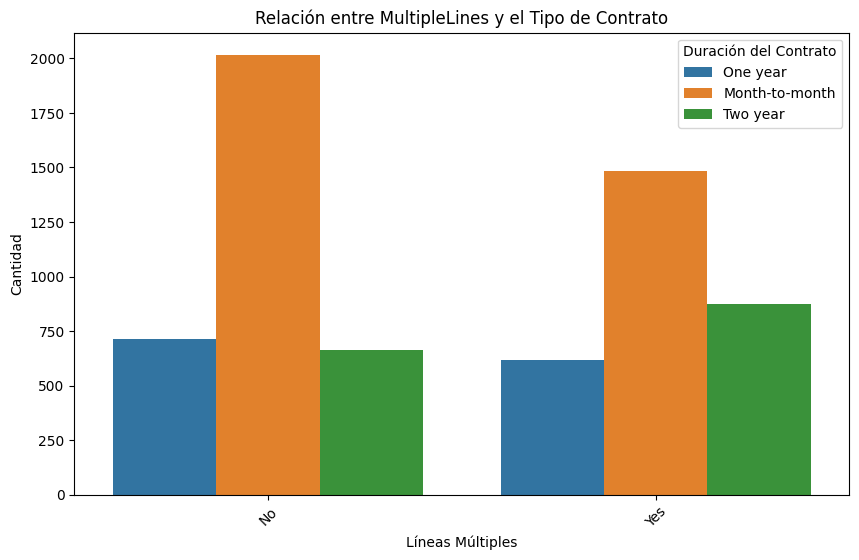


--- Relación entre InternetService y MultipleLines ---

MultipleLines      No   Yes
InternetService            
DSL              1048   691
Fiber optic      1158  1938


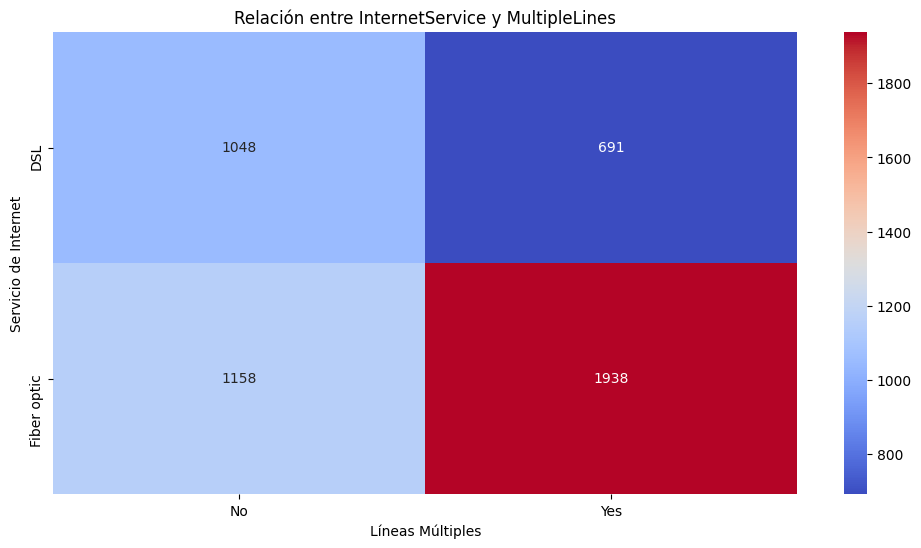

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Relación entre InternetService y el tipo de contrato
merged_contract_internet = contract.merge(internet, on='customerID', how='inner')

# Conteo cruzado
internet_type_cross = pd.crosstab(merged_contract_internet['InternetService'], merged_contract_internet['Type'])
print("\n--- Relación entre InternetService y el Tipo de Contrato ---\n")
print(internet_type_cross)

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_contract_internet, x='InternetService', hue='Type')
plt.title('Relación entre InternetService y el Tipo de Contrato')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad')
plt.legend(title='Duración del Contrato')
plt.xticks(rotation=45)
plt.show()

# 2. Relación entre MultipleLines y el tipo de contrato
merged_contract_phone = contract.merge(phone, on='customerID', how='inner')

# Conteo cruzado
multiple_lines_cross = pd.crosstab(merged_contract_phone['MultipleLines'], merged_contract_phone['Type'])
print("\n--- Relación entre MultipleLines y el Tipo de Contrato ---\n")
print(multiple_lines_cross)

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_contract_phone, x='MultipleLines', hue='Type')
plt.title('Relación entre MultipleLines y el Tipo de Contrato')
plt.xlabel('Líneas Múltiples')
plt.ylabel('Cantidad')
plt.legend(title='Duración del Contrato')
plt.xticks(rotation=45)
plt.show()

# 3. Combinación de InternetService y MultipleLines
merged_data = internet.merge(phone, on='customerID', how='inner')

# Conteo cruzado
internet_lines_cross = pd.crosstab(merged_data['InternetService'], merged_data['MultipleLines'])
print("\n--- Relación entre InternetService y MultipleLines ---\n")
print(internet_lines_cross)

# Gráfico
plt.figure(figsize=(12, 6))
sns.heatmap(internet_lines_cross, annot=True, fmt='d', cmap='coolwarm')
plt.title('Relación entre InternetService y MultipleLines')
plt.xlabel('Líneas Múltiples')
plt.ylabel('Servicio de Internet')
plt.show()


In [51]:
print('Valores únicos en EndDate antes de limpieza:')
print(contract['EndDate'].unique())

# Reemplaza valores 'no' y '' por none (nan)
contract['EndDate'] = contract['EndDate'].replace(['No', ''], None)

# Convierte a datetime (NaT para errores)
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

print('\nValores únicos en EndDate después de limpieza:')
print(contract['EndDate'].unique())

# Convertir BeginDate a datetime también
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')

# Calcular duración en meses
contract['DurationMonths'] = (contract['EndDate'] - contract['BeginDate']).dt.days // 30

print('\nDuración calculada:')
print(contract[['customerID', 'BeginDate', 'EndDate', 'DurationMonths']].head())


Valores únicos en EndDate antes de limpieza:
[                          'NaT' '2019-12-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000']

Valores únicos en EndDate después de limpieza:
[                          'NaT' '2019-12-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000']

Duración calculada:
   customerID  BeginDate    EndDate  DurationMonths
0  7590-VHVEG 2020-01-01        NaT             NaN
1  5575-GNVDE 2017-04-01        NaT             NaN
2  3668-QPYBK 2019-10-01 2019-12-01             2.0
3  7795-CFOCW 2016-05-01 2019-12-01            43.0
4  9237-HQITU 2019-09-01 2019-11-01             2.0


--- Duración Promedio del Contrato por Tipo ---
Type
Month-to-month    16.569437
One year          39.899457
Two year          54.531563
Name: DurationMonths, dtype: float64


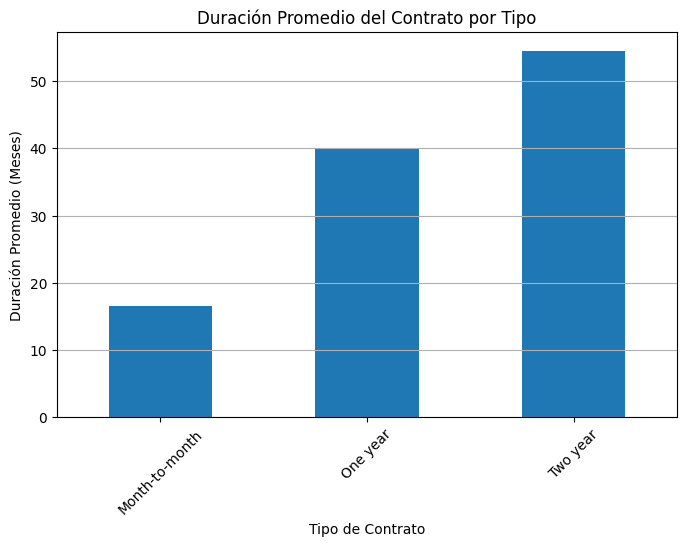


--- Cancelaciones por Tipo de Contrato ---
Month-to-month    3874
Two year          1695
One year          1472
Name: Type, dtype: int64


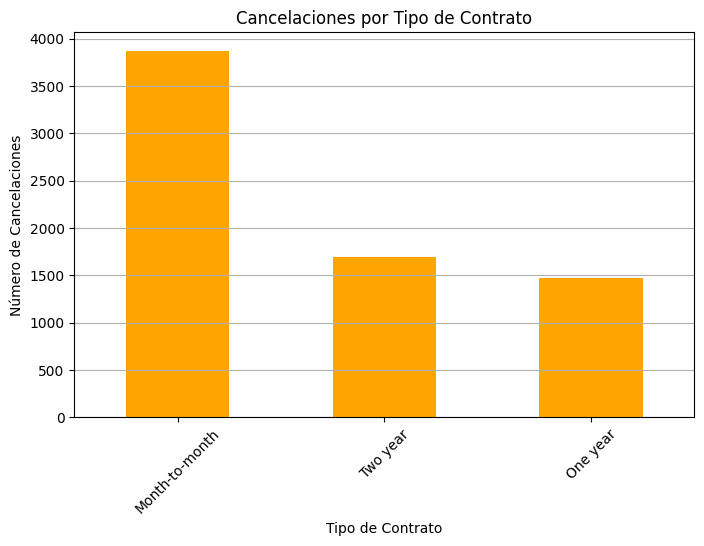


--- Evolución de Nuevos Contratos ---
MonthYear
2013-10      3
2013-11      2
2013-12      3
2014-01      7
2014-02    366
          ... 
2019-10    237
2019-11    237
2019-12    220
2020-01    233
2020-02     11
Freq: M, Length: 77, dtype: int64


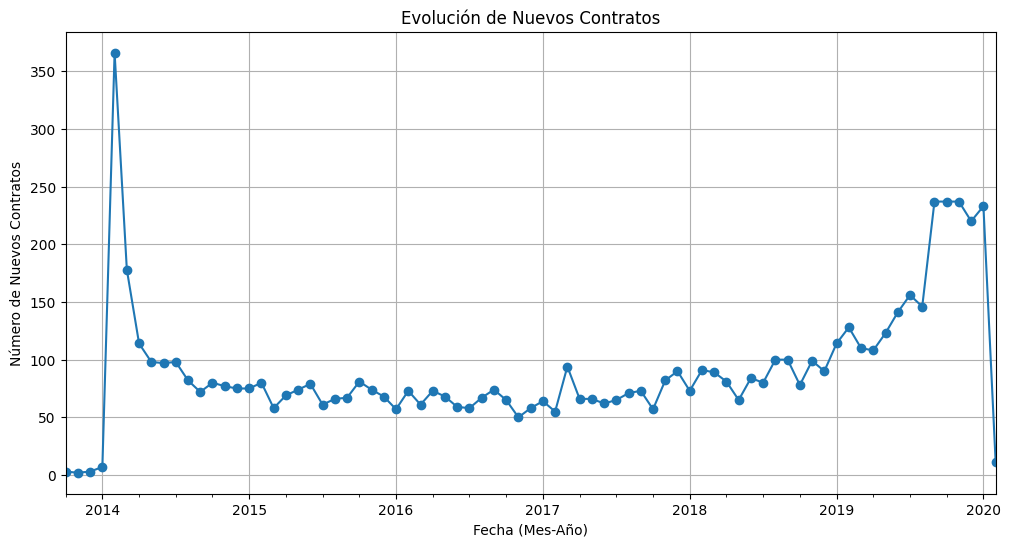


--- Cancelaciones por Tipo de Contrato e InternetService ---
InternetService   DSL  Fiber optic
Type                              
Month-to-month   1222         2128
One year          569          539
Two year          628          429


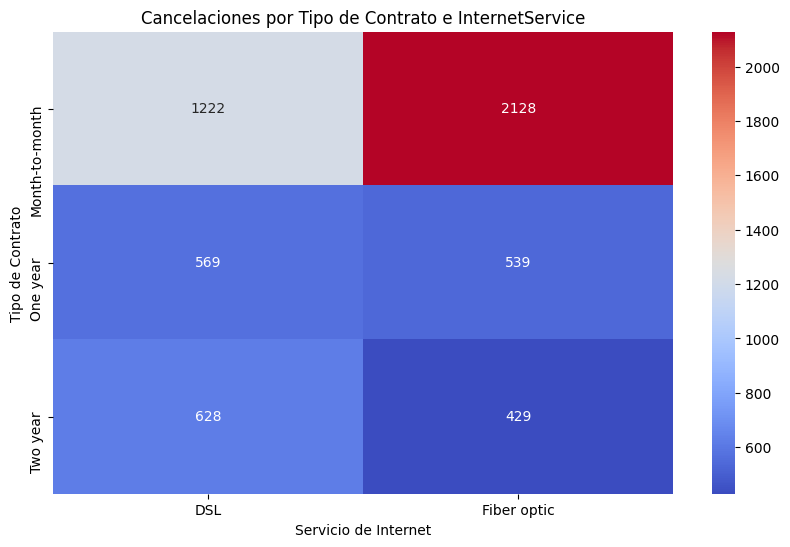

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir las fechas en formato datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = contract['EndDate'].replace('No', None)
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

# Calcular duración del contrato en meses (para contratos finalizados)
contract['DurationMonths'] = (contract['EndDate'] - contract['BeginDate']).dt.days // 30

# 1. Duración promedio del contrato por tipo
duration_by_type = contract.groupby('Type')['DurationMonths'].mean()
print('--- Duración Promedio del Contrato por Tipo ---')
print(duration_by_type)

# Visualización de la tabla como gráfico
duration_by_type.plot(kind='bar', figsize=(8, 5), title='Duración Promedio del Contrato por Tipo', legend=False)
plt.ylabel('Duración Promedio (Meses)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Cancelaciones por tipo de contrato
cancellations_by_type = contract[contract['EndDate'].notnull()]['Type'].value_counts()
print('\n--- Cancelaciones por Tipo de Contrato ---')
print(cancellations_by_type)

# Visualización de la tabla como gráfico
cancellations_by_type.plot(kind='bar', figsize=(8, 5), title='Cancelaciones por Tipo de Contrato', legend=False, color='orange')
plt.ylabel('Número de Cancelaciones')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Evolución de nuevos contratos
contract['MonthYear'] = contract['BeginDate'].dt.to_period('M')
new_contracts_trend = contract.groupby('MonthYear').size()

# Imprimir la tabla de la evolución de nuevos contratos
print('\n--- Evolución de Nuevos Contratos ---')
print(new_contracts_trend)

# Gráfico: Evolución de nuevos contratos
plt.figure(figsize=(12, 6))
new_contracts_trend.plot(kind='line', marker='o', title='Evolución de Nuevos Contratos')
plt.xlabel('Fecha (Mes-Año)')
plt.ylabel('Número de Nuevos Contratos')
plt.grid()
plt.show()

# 4. Relación entre tipo de contrato y cancelaciones con InternetService
merged_internet = contract.merge(internet, on='customerID', how='left')
cancel_analysis = merged_internet[merged_internet['EndDate'].notnull()].groupby(['Type', 'InternetService']).size().unstack()

# Imprimir la tabla de cancelaciones según el servicio de Internet y tipo de contrato
print('\n--- Cancelaciones por Tipo de Contrato e InternetService ---')
print(cancel_analysis)

# Gráfico: Cancelaciones según el servicio de Internet y tipo de contrato
plt.figure(figsize=(10, 6))
sns.heatmap(cancel_analysis, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Cancelaciones por Tipo de Contrato e InternetService')
plt.xlabel('Servicio de Internet')
plt.ylabel('Tipo de Contrato')
plt.show()


Resumen del análisis hasta ahora.

Duración promedio del contrato por tipo:

Los contratos Month-to-month tienen una duración promedio de aproximadamente 16.6 meses.
Los contratos de One year duran en promedio casi 40 meses.
Los contratos de Two year tienen la mayor duración promedio, cerca de 54.5 meses.
Esto indica que los clientes con contratos a más largo plazo tienden a mantenerse activos más tiempo, como era esperado.


Cancelaciones por tipo de contrato:

La mayor cantidad de cancelaciones se da en contratos Month-to-month (3874), seguidos por Two year (1695) y luego One year (1472).
Esto sugiere que los contratos mensuales tienen mayor rotación, mientras los contratos anuales o bianuales retienen mejor a los clientes.


Evolución de Nuevos Contratos a lo Largo del Tiempo:

Se observó la tendencia mensual en la adquisición de nuevos contratos desde 2013 hasta 2020.
Hay variabilidad mensual y cierta estacionalidad que puede influir en la captación de clientes y la dinámica del mercado.


Cancelaciones por Tipo de Contrato e Internet Service:

Se cruzaron las cancelaciones por tipo de contrato con el servicio de Internet contratado (DSL vs Fiber optic).
Los contratos Month-to-month tienen las cancelaciones más altas tanto en DSL (1222) como en Fiber optic (2128).
En general, las cancelaciones son mayores para clientes con servicio Fiber optic en contratos mensuales.

Preguntas aclaratorias


Sobre el conjunto de datos:
¿Existen clientes que están activos pero con una fecha de finalización registrada? ¿Cómo debemos tratarlos?
¿Hay información adicional o externa que pueda complementar el análisis (por ejemplo, indicadores de mercado o datos de competencia)?
¿Los cargos mensuales y totales están completamente actualizados al 1 de febrero de 2020?


Sobre el objetivo del modelo:

¿El modelo debe priorizar la detección temprana de cancelaciones, incluso a costa de un mayor número de falsos positivos?
¿Qué porcentaje de clientes se considera aceptable como tasa de cancelación futura para la implementación de estrategias de retención?


Sobre la interpretación de resultados:
¿Qué características se consideran más relevantes por parte del negocio para la toma de decisiones? Por ejemplo, ¿el impacto del servicio de internet es más importante que los cargos mensuales?



Plan de Trabajo

Análisis Exploratorio de Datos:
Examinar la estructura de cada conjunto de datos (contract.csv, personal.csv, internet.csv, phone.csv).
Identificar valores ausentes, duplicados o inconsistencias.
Realizar visualizaciones iniciales para explorar tendencias, distribuciones y relaciones entre características clave (por ejemplo, tipo de contrato vs cancelaciones).


Formulación de Hipótesis:
Definir hipótesis clave para comprender los factores que influyen en la cancelación de clientes. Estas incluyen la relación entre el tipo de contrato, los servicios contratados, el perfil del cliente y los cargos mensuales con la tasa de cancelación.


Preparación de Datos:
Unir los diferentes conjuntos de datos en un solo marco de trabajo.
Crear nuevas columnas derivadas (como duración del contrato o tasas de cancelación por grupo).
Estandarizar las columnas categóricas y convertir fechas en formatos útiles.


Pruebas de Hipótesis:
Utilizar pruebas estadísticas para confirmar o rechazar las hipótesis formuladas.
Identificar las variables con mayor influencia en la tasa de cancelación.


Diseño del Modelo Predictivo:
Seleccionar un modelo base (como árboles de decisión o regresión logística).
Entrenar y validar el modelo utilizando técnicas de partición del conjunto de datos.
Evaluar el modelo en términos de métricas clave como precisión, sensibilidad y tasa F1.